PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.

In [71]:
import pandas as pd

In [72]:
def load_data(filename):
    return pd.read_csv(filename)

filename = "titanic_disaster.csv"
titanic_df = load_data(filename)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

<bound method DataFrame.count of      PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

      

<Axes: >

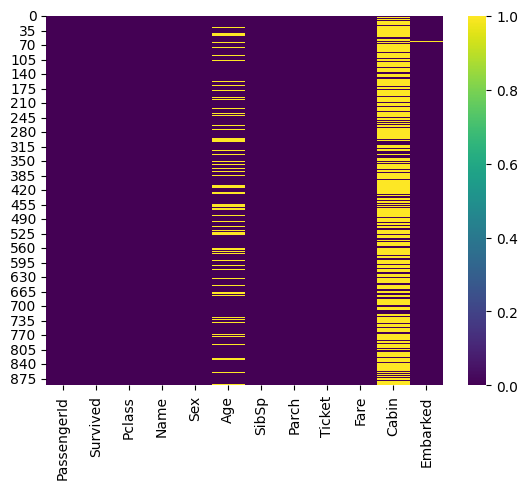

In [29]:
dfage = titanic_df[titanic_df['Age'].isna()]
print(dfage.count)

dfcabin = titanic_df[titanic_df['Cabin'].isna()]
print(dfcabin.count)

dfembarked = titanic_df[titanic_df['Embarked'].isna()]
print(dfembarked.count)

# co 177 dong co age = null
# co 687 dong co cabin = null
# co 22 dong co embarked = null

#truc quan hoa bang heatmap
import seaborn as sns
sns.heatmap(titanic_df.isna(), cmap='viridis')

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name

In [17]:
titanic_df[['firstName', 'secondName']] = titanic_df['Name'].str.split(',', expand=True)
titanic_df_splitname = titanic_df.drop("Name", axis=1)
titanic_df_splitname.head(5)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [30]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 'M', 'female': 'F'})
print(titanic_df[['Sex']].head(10))

  Sex
0   M
1   F
2   F
3   F
4   M
5   M
6   M
7   M
8   F
9   F


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau

a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

<Axes: xlabel='Pclass', ylabel='Age'>

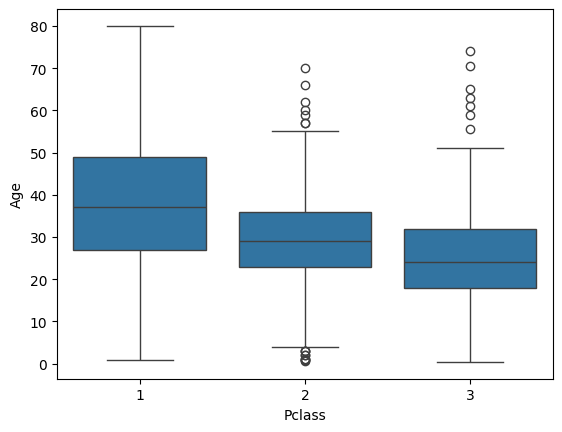

In [31]:
import seaborn as sns
sns.boxplot(y='Age', x='Pclass', data=titanic_df)

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.

In [32]:
titanic_df["Age"][titanic_df["Pclass"] == 1] = titanic_df["Age"][titanic_df["Pclass"] == 1].fillna(titanic_df["Age"][titanic_df["Pclass"] == 1].median(), inplace=False)
titanic_df["Age"][titanic_df["Pclass"] == 2] = titanic_df["Age"][titanic_df["Pclass"] == 2].fillna(titanic_df["Age"][titanic_df["Pclass"] == 2].median(), inplace=False)
titanic_df["Age"][titanic_df["Pclass"] == 3] = titanic_df["Age"][titanic_df["Pclass"] == 3].fillna(titanic_df["Age"][titanic_df["Pclass"] == 3].median(), inplace=False)

C:\Users\Qtgroup\AppData\Local\Temp\ipykernel_17292\1573923376.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_df["Age"][titanic_df["Pclass"] == 1] = titanic_df["Age"][titanic_df["Pclass"] == 1].fillna(titanic_df["Age"][titanic_d

<Axes: >

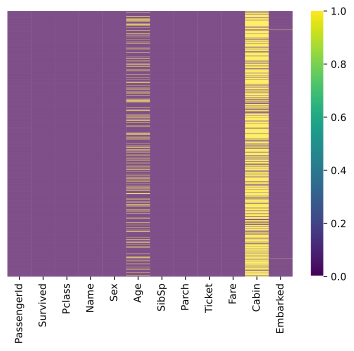

In [73]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(titanic_df.isna(),yticklabels=False, cbar=True, cmap='viridis')

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [74]:
# tuong tu lab1
titanic_df.loc[titanic_df['Age'] < 12, 'AgeGroup'] = 'Kid'
titanic_df.loc[(titanic_df['Age'] >= 12) & (titanic_df['Age'] < 18), 'AgeGroup'] = 'Teen'
titanic_df.loc[(titanic_df['Age'] >= 18) & (titanic_df['Age'] < 60), 'AgeGroup'] = 'Adult'
titanic_df.loc[titanic_df['Age'] >= 60, 'AgeGroup'] = 'Older'\

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi “secondName”

In [ ]:
# Tạo danh sách chứa các danh xưng
listNamePrefix = []

# Duyệt qua từng dòng dữ liệu
for index, row in titanic_df.iterrows():
    # Tìm vị trí của khoảng trắng đầu tiên trong 'secondName'
    vitri = row['secondName'].strip().find(' ')
    
    # Nếu có khoảng trắng (tức là có danh xưng), lấy phần trước khoảng trắng
    if vitri != -1:
        namePrefix = row['secondName'][:vitri]  # Lấy phần trước dấu cách
    else:
        # Nếu không có khoảng trắng (ví dụ chỉ có tên), gán giá trị trống
        namePrefix = row['secondName']
    
    # Thêm danh xưng vào danh sách
    listNamePrefix.append(namePrefix)

# Chuyển danh sách thành DataFrame và thêm vào DataFrame gốc
cotNamePrefix = pd.DataFrame(listNamePrefix, columns=['namePrefix'])
titanic_df = pd.concat([titanic_df, cotNamePrefix], axis=1)

# Hiển thị kết quả
print(titanic_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [93]:
# Tạo cột 'familySize' theo công thức: familySize = 1 + SibSp + Parch
titanic_df['familySize'] = 1 + titanic_df['SibSp'] + titanic_df['Parch']

# Hiển thị 10 dòng đầu tiên để kiểm tra kết quả
print(titanic_df[['PassengerId', 'SibSp', 'Parch', 'familySize']].head(10))


   PassengerId  SibSp  Parch  familySize
0            1      1      0           2
1            2      1      0           2
2            3      0      0           1
3            4      1      0           2
4            5      0      0           1
5            6      0      0           1
6            7      0      0           1
7            8      3      1           5
8            9      0      2           3
9           10      1      0           2


9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [94]:
# Tạo cột 'Alone' dựa trên giá trị của 'familySize'
titanic_df['Alone'] = titanic_df['familySize'].apply(lambda x: 1 if x == 1 else 0)

# Hiển thị 10 dòng đầu tiên để kiểm tra kết quả
print(titanic_df[['PassengerId', 'familySize', 'Alone']].head(10))


   PassengerId  familySize  Alone
0            1           2      0
1            2           2      0
2            3           1      1
3            4           2      0
4            5           1      1
5            6           1      1
6            7           1      1
7            8           5      0
8            9           3      0
9           10           2      0


10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng “Unknown”


In [95]:
# Tách loại cabin (typeCabin) từ chữ cái đầu tiên của cột 'Cabin'
titanic_df['typeCabin'] = titanic_df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'Unknown')

# Hiển thị 10 dòng đầu tiên để kiểm tra kết quả
print(titanic_df[['PassengerId', 'Cabin', 'typeCabin']].head(10))


   PassengerId Cabin typeCabin
0            1   NaN   Unknown
1            2   C85         C
2            3   NaN   Unknown
3            4  C123         C
4            5   NaN   Unknown
5            6   NaN   Unknown
6            7   E46         E
7            8   NaN   Unknown
8            9   NaN   Unknown
9           10   NaN   Unknown


11. Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện (train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện.q

In [98]:
# import pandas as pd

###Tải dữ liệu từ các tập train.csv và test.csv
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')

### Loại bỏ các hành khách có 'PassengerId' trùng lặp giữa tập train và test
### Giữ lại các hành khách trong train và loại bỏ các hành khách trùng lặp trong test
# test_df_cleaned = test_df[~test_df['PassengerId'].isin(train_df['PassengerId'])]

### Hiển thị số lượng dữ liệu sau khi loại bỏ
# print(f"Số lượng hành khách trong train.csv: {len(train_df)}")
# print(f"Số lượng hành khách trong test.csv trước khi loại bỏ: {len(test_df)}")
# print(f"Số lượng hành khách trong test.csv sau khi loại bỏ: {len(test_df_cleaned)}")

PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA

Hướng dẫn: Sinh viên cần đưa ra nhận xét sau mỗi biểu đồ trực quan nhằm rút trích được
thông tin có giá trị về hành khách sống sót dựa trên các đặc trưng bên trên

12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.

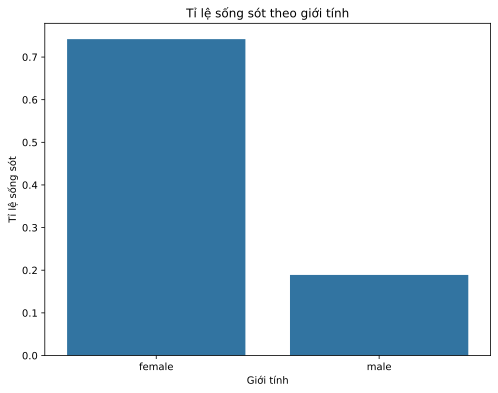

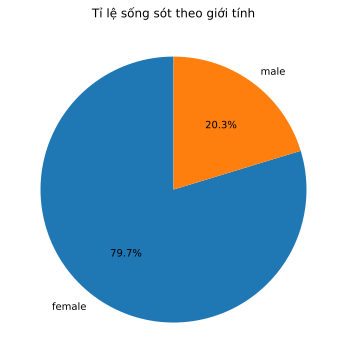

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp tin CSV (ví dụ: titanic_disaster.csv)
data = pd.read_csv('titanic_disaster.csv')

# Tính tỉ lệ sống sót theo giới tính
survival_rate_by_gender = data.groupby('Sex')['Survived'].mean()

# Trực quan thông tin tương quan bằng biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values)
plt.title('Tỉ lệ sống sót theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Tỉ lệ sống sót')
plt.show()
# Trực quan thông tin tương quan bằng biểu đồ hình tròn
plt.figure(figsize=(6, 6))
plt.pie(survival_rate_by_gender, labels=survival_rate_by_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ sống sót theo giới tính')
plt.show()

13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass)

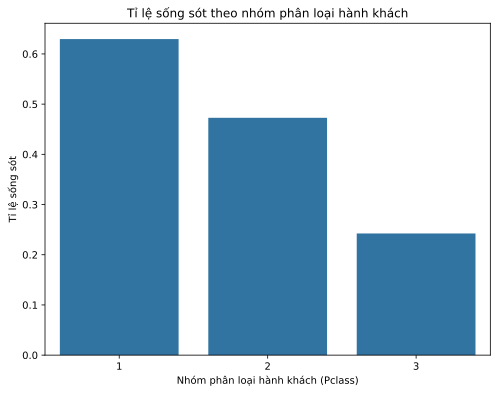

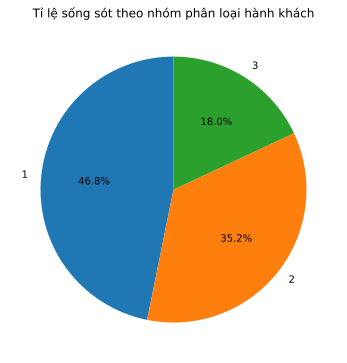

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp tin CSV (ví dụ: titanic_disaster.csv)
data = pd.read_csv('titanic_disaster.csv')

# Tính tỉ lệ sống sót theo nhóm phân loại hành khách (Pclass)
survival_rate_by_class = data.groupby('Pclass')['Survived'].mean()

# Trực quan thông tin sống sót trên từng nhóm phân loại hành khách bằng biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values)
plt.title('Tỉ lệ sống sót theo nhóm phân loại hành khách')
plt.xlabel('Nhóm phân loại hành khách (Pclass)')
plt.ylabel('Tỉ lệ sống sót')
plt.show()
# Trực quan thông tin sống sót trên từng nhóm phân loại hành khách bằng biểu đồ hình tròn
plt.figure(figsize=(6, 6))
plt.pie(survival_rate_by_class, labels=survival_rate_by_class.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ sống sót theo nhóm phân loại hành khách')
plt.show()


14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác

C:\Users\Qtgroup\AppData\Local\Temp\ipykernel_17292\1791826678.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(data.pivot_table(index='Survived', columns=['Sex', 'AgeGroup'], values='PassengerId', aggfunc='count'), annot=True, fmt='g', cmap='coolwarm')


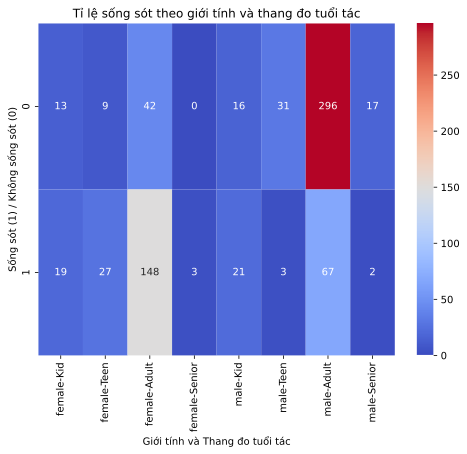

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp tin CSV (ví dụ: titanic_disaster.csv)
data = pd.read_csv('titanic_disaster.csv')

# Tạo một biến 'AgeGroup' để phân loại hành khách theo độ tuổi
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 60, float('inf')], labels=['Kid', 'Teen', 'Adult', 'Senior'])

# Trực quan thông tin sống sót trên từng nhóm giới tính và thang đo tuổi tác bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.pivot_table(index='Survived', columns=['Sex', 'AgeGroup'], values='PassengerId', aggfunc='count'), annot=True, fmt='g', cmap='coolwarm')
plt.title('Tỉ lệ sống sót theo giới tính và thang đo tuổi tác')
plt.xlabel('Giới tính và Thang đo tuổi tác')
plt.ylabel('Sống sót (1) / Không sống sót (0)')
plt.show()


15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng

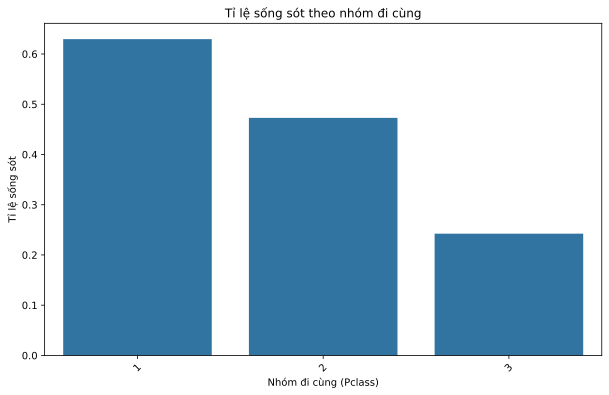

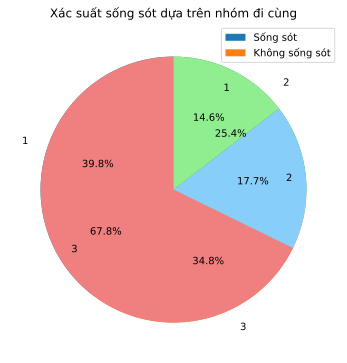

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp tin CSV (ví dụ: titanic_disaster.csv)
data = pd.read_csv('titanic_disaster.csv')

# Tính tỉ lệ sống sót theo nhóm đi cùng (familySize)
survival_rate_by_family_size = data.groupby('Pclass')['Survived'].mean()

# Trực quan thông tin sống sót trên từng nhóm đi cùng bằng biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_by_family_size.index, y=survival_rate_by_family_size.values)
plt.title('Tỉ lệ sống sót theo nhóm đi cùng')
plt.xlabel('Nhóm đi cùng (Pclass)')
plt.ylabel('Tỉ lệ sống sót')
plt.xticks(rotation=45)
plt.show()
# Tính số lượng hành khách sống sót và không sống sót theo nhóm đi cùng (familySize)
survived_counts = data[data['Survived'] == 1]['Pclass'].value_counts()
not_survived_counts = data[data['Survived'] == 0]['Pclass'].value_counts()

# Trực quan xác suất sống sót dựa trên nhóm đi cùng bằng biểu đồ hình tròn
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90, labeldistance=1.15)
plt.pie(not_survived_counts, labels=not_survived_counts.index, autopct='%1.1f%%', startangle=90, labeldistance=0.85,
        colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow'])
plt.title('Xác suất sống sót dựa trên nhóm đi cùng')
plt.legend(['Sống sót', 'Không sống sót'], loc='upper right')
plt.show()


16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé

C:\Users\Qtgroup\AppData\Local\Temp\ipykernel_17292\3166295045.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Survived'] == 1]['Fare'], color='green', shade=True, label='Sống sót')
C:\Users\Qtgroup\AppData\Local\Temp\ipykernel_17292\3166295045.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Survived'] == 0]['Fare'], color='red', shade=True, label='Không sống sót')


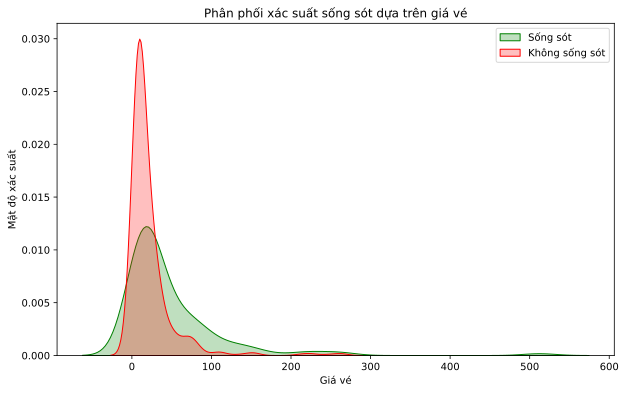

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp tin CSV (ví dụ: titanic_disaster.csv)
data = pd.read_csv('titanic_disaster.csv')

# Trực quan xác suất sống sót dựa trên thông tin giá vé bằng biểu đồ KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Survived'] == 1]['Fare'], color='green', shade=True, label='Sống sót')
sns.kdeplot(data[data['Survived'] == 0]['Fare'], color='red', shade=True, label='Không sống sót')
plt.title('Phân phối xác suất sống sót dựa trên giá vé')
plt.xlabel('Giá vé')
plt.ylabel('Mật độ xác suất')
plt.legend()
plt.show()

17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến.

<Figure size 1000x600 with 0 Axes>

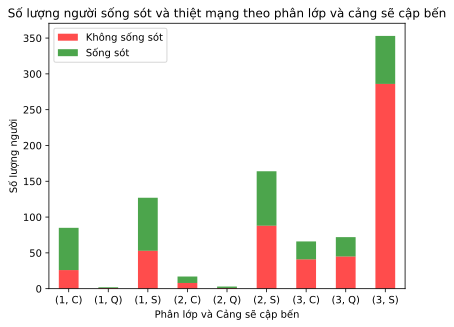

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp tin CSV (ví dụ: titanic_disaster.csv)
data = pd.read_csv('titanic_disaster.csv')

# Tính số lượng người sống sót và thiệt mạng theo phân lớp hành khách và cảng sẽ cập bến
survived_by_class_and_embarked = data.groupby(['Pclass', 'Embarked'])['Survived'].value_counts().unstack().fillna(0)

# Trực quan số lượng người sống sót và thiệt mạng bằng stacked bar chart
plt.figure(figsize=(10, 6))
survived_by_class_and_embarked.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)
plt.title('Số lượng người sống sót và thiệt mạng theo phân lớp và cảng sẽ cập bến')
plt.xlabel('Phân lớp và Cảng sẽ cập bến')
plt.ylabel('Số lượng người')
plt.legend(['Không sống sót', 'Sống sót'])
plt.xticks(rotation=0)
plt.show()
